# This is my Notebook for IBM Data Science Capstone Project (Classification of Torronto Neighbourhood)

In [6]:
!pip install --upgrade numpy

     |████████████████████████████████| 15.3 MB 16.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-watson-machine-learning 1.0.53 requires pandas<=1.0.5, but you have pandas 1.2.3 which is incompatible.


The project includes scraping & cleansing of the Wikipedia page for codes of Canada and then processing the data for the clustering.

**Scraping the Wikipedia Source page for the table of postal codes of Canada**

**Step-1:Installing and Importing the required Libraries**

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
#import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --aayes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: --aayes
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1962
  - defaults/noarch::ibm-wsrt-py37main-main==custom=1962
done

# All requested packages already installed.

Folium installed
Libraries imported.


**Step-2: Using BeautifulSoup Library of Python, for web scraping of table from the Wikipedia:**

In [2]:
source = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)                         #Printing title of the webpage to check if the page has been scraped 
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


**Step-3 : Converting it into Pandas DataFrame**

In [3]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


**Step-4: Processing & Cleansing the Data:**

In [4]:

df1 = df[df.Borough != 'Not assigned']    # Dropping rows where Borough is 'Not assigned'

df2 = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)  # Combining neighbourhoods with same Postal-code
df2.reset_index(inplace=True)

df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])  # Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough

df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


**Step-5: Shape of DataFrame:**

In [5]:
df2.shape

(103, 3)

----------------------------- **End of NoteBook (Part-1)** ---------------------------------------

# **(Part-2): Geographical coordinates of each postal code**

**Step-1: Importing the csv file conatining the latitudes and longitude**

In [6]:
lat_longitude = pd.read_csv('https://cocl.us/Geospatial_data')
lat_longitude.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


**Step-2: Merging the 2 DataFrames**

In [7]:
df3 = pd.merge(df2,lat_longitude,on='Postal Code')
df3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


----------------------------- **End of NoteBook (Part-2)** ---------------------------------------

# **(Part-3): Clustering & Visualizing Neighborhood**

**Step:1 Clustering all the rows from the data frame which contains Toronto in their Borough**

In [21]:
df_toronto = df3[df3['Borough'].str.contains('Toronto',regex=False)]
#df_toronto
df_toronto1 = df_toronto[['Borough','Neighbourhood','Latitude','Longitude']]

**Step-2: Visualizing all the Neighbourhoods through Folium library:**

In [9]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df_toronto['Latitude'],df_toronto['Longitude'],df_toronto['Borough'],df_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='yellow',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.8,
    parse_html=False).add_to(map_toronto)
map_toronto

----------------------------- **End of NoteBook (Part-3)** ---------------------------------------

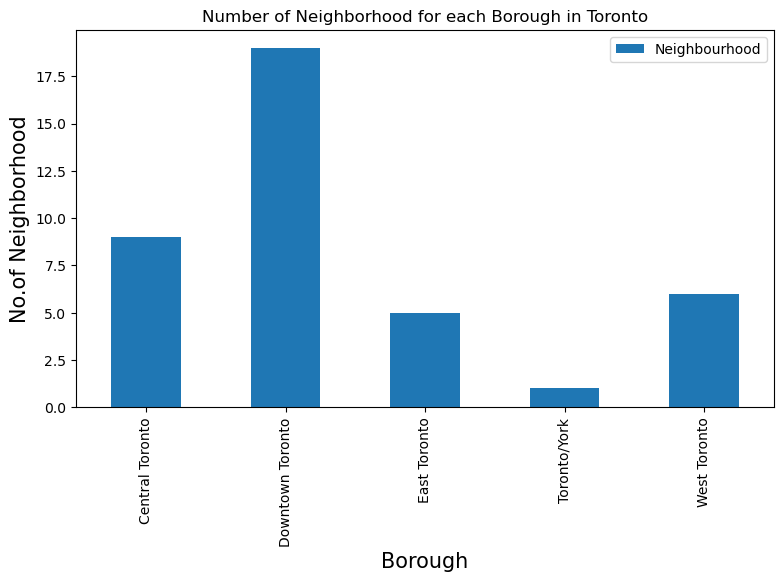

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df_toronto.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

# **Define Foursquare Credentials and Version**

**Step-1 : Defining credentials:**

In [12]:
CLIENT_ID = 'FI0TP43OOSYSUVVFRFHQAIF5YIOJLE0TBY4044WOTZRZVBLI' # your Foursquare ID
CLIENT_SECRET = 'FDEKE3FMRHJU1PWN3O00GIVZ2CGRQPK52KDYRTJEFXUYNUFR' # your Foursquare Secret
ACCESS_TOKEN = 'I2AMKTPDM0CTIGRK4DXN232OU1W4JT5HSCCAUFEQAJMRYV2R' # your FourSquare Access Token
VERSION = '20210321'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FI0TP43OOSYSUVVFRFHQAIF5YIOJLE0TBY4044WOTZRZVBLI
CLIENT_SECRET:FDEKE3FMRHJU1PWN3O00GIVZ2CGRQPK52KDYRTJEFXUYNUFR


In [43]:
address = 'Toronto,Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Coffee'
radius = 10000
print(search_query + ' .... OK!')


43.6534817 -79.3839347
Coffee .... OK!


**We will define url for getting the coffee shop venues**

In [45]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '605786dc8a4a017d77997be5'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '59f784dd28122f14f9d5d63d',
    'name': 'HotBlack Coffee',
    'location': {'address': '245 Queen Street West',
     'crossStreet': 'at St Patrick St',
     'lat': 43.65036434800487,
     'lng': -79.38866907575726,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65036434800487,
       'lng': -79.38866907575726}],
     'distance': 515,
     'postalCode': 'M5V 1Z4',
     'cc': 'CA',
     'neighborhood': 'Entertainment District',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['245 Queen Street West (at St Patrick St)',
      'Toronto ON M5V 1Z4',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sq

**Converting the list of Coffee Shops into DataFrame**

In [46]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,59f784dd28122f14f9d5d63d,HotBlack Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,245 Queen Street West,at St Patrick St,43.650364,-79.388669,"[{'label': 'display', 'lat': 43.65036434800487...",515,M5V 1Z4,CA,Entertainment District,Toronto,ON,Canada,"[245 Queen Street West (at St Patrick St), Tor...",463001529
1,4b44fc77f964a520cc0026e3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,427 University Avenue,NaN,43.654053,-79.388090,"[{'label': 'display', 'lat': 43.65405317976302...",340,NaN,CA,NaN,Toronto,ON,Canada,"[427 University Avenue, Toronto ON, Canada]",NaN
2,4b0aaa8ef964a520272623e3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,"483 Bay St, Bell Trinity Square",Bell Trinity Square,43.653436,-79.382314,"[{'label': 'display', 'lat': 43.653436, 'lng':...",130,M5G 2C9,CA,NaN,Toronto,ON,Canada,"[483 Bay St, Bell Trinity Square (Bell Trinity...",NaN
3,4fb13c20e4b011e6f93513c0,Balzac's Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,122 Bond Street,at Gould St.,43.657854,-79.379200,"[{'label': 'display', 'lat': 43.65785440672277...",618,M5B 1X8,CA,NaN,Toronto,ON,Canada,"[122 Bond Street (at Gould St.), Toronto ON M5...",NaN
4,4baa9f6cf964a520817a3ae3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,401 Bay St.,at Richmond St. W,43.652135,-79.381172,"[{'label': 'display', 'lat': 43.65213455850074...",268,M5H 2Y4,CA,NaN,Toronto,ON,Canada,"[401 Bay St. (at Richmond St. W), Toronto ON M...",NaN
5,53e8acc4498ee294fb100183,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,425 University Ave,Dundas,43.654270,-79.387448,"[{'label': 'display', 'lat': 43.65427, 'lng': ...",296,M5G 1T6,CA,NaN,Toronto,ON,Canada,"[425 University Ave (Dundas), Toronto ON M5G 1...",NaN
6,4baa31def964a52037523ae3,Coffee office,[],v-1616348892,False,350 Bay St - 7th Floor,NaN,43.649498,-79.386479,"[{'label': 'display', 'lat': 43.649498, 'lng':...",488,NaN,CA,NaN,Toronto,ON,Canada,"[350 Bay St - 7th Floor, Toronto ON, Canada]",NaN
7,4fff1f96e4b042ae8acddca5,Fahrenheit Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,120 Lombard St,at Jarvis St,43.652384,-79.372719,"[{'label': 'display', 'lat': 43.65238358726612...",911,M5C 3H5,CA,NaN,Toronto,ON,Canada,"[120 Lombard St (at Jarvis St), Toronto ON M5C...",NaN
8,4ec514ec9911232436e364af,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1616348892,False,Yonge,Dundas,43.656700,-79.379941,"[{'label': 'display', 'lat': 43.65669995833159...",481,M5B 2G9,CA,NaN,Toronto,ON,Canada,"[Yonge (Dundas), Toronto ON M5B 2G9, Canada]",NaN
9,4fccaa8fe4b05a98df3d9417,Sam James Coffee Bar (SJCB),"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1616348892,False,150 King St. W,in the PATH,43.647881,-79.384332,"[{'label': 'display', 'lat': 43.64788137014028...",624,M5H 4B6,CA,NaN,Toronto,ON,Canada,"[150 King St. W (in the PATH), Toronto ON M5H ...",NaN


**Filtering the result set**

In [47]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,HotBlack Coffee,Coffee Shop,245 Queen Street West,at St Patrick St,43.650364,-79.388669,"[{'label': 'display', 'lat': 43.65036434800487...",515,M5V 1Z4,CA,Entertainment District,Toronto,ON,Canada,"[245 Queen Street West (at St Patrick St), Tor...",59f784dd28122f14f9d5d63d
1,Timothy's World Coffee,Coffee Shop,427 University Avenue,NaN,43.654053,-79.388090,"[{'label': 'display', 'lat': 43.65405317976302...",340,NaN,CA,NaN,Toronto,ON,Canada,"[427 University Avenue, Toronto ON, Canada]",4b44fc77f964a520cc0026e3
2,Timothy's World Coffee,Coffee Shop,"483 Bay St, Bell Trinity Square",Bell Trinity Square,43.653436,-79.382314,"[{'label': 'display', 'lat': 43.653436, 'lng':...",130,M5G 2C9,CA,NaN,Toronto,ON,Canada,"[483 Bay St, Bell Trinity Square (Bell Trinity...",4b0aaa8ef964a520272623e3
3,Balzac's Coffee,Coffee Shop,122 Bond Street,at Gould St.,43.657854,-79.379200,"[{'label': 'display', 'lat': 43.65785440672277...",618,M5B 1X8,CA,NaN,Toronto,ON,Canada,"[122 Bond Street (at Gould St.), Toronto ON M5...",4fb13c20e4b011e6f93513c0
4,Timothy's World Coffee,Coffee Shop,401 Bay St.,at Richmond St. W,43.652135,-79.381172,"[{'label': 'display', 'lat': 43.65213455850074...",268,M5H 2Y4,CA,NaN,Toronto,ON,Canada,"[401 Bay St. (at Richmond St. W), Toronto ON M...",4baa9f6cf964a520817a3ae3
5,Timothy's World Coffee,Coffee Shop,425 University Ave,Dundas,43.654270,-79.387448,"[{'label': 'display', 'lat': 43.65427, 'lng': ...",296,M5G 1T6,CA,NaN,Toronto,ON,Canada,"[425 University Ave (Dundas), Toronto ON M5G 1...",53e8acc4498ee294fb100183
6,Coffee office,None,350 Bay St - 7th Floor,NaN,43.649498,-79.386479,"[{'label': 'display', 'lat': 43.649498, 'lng':...",488,NaN,CA,NaN,Toronto,ON,Canada,"[350 Bay St - 7th Floor, Toronto ON, Canada]",4baa31def964a52037523ae3
7,Fahrenheit Coffee,Coffee Shop,120 Lombard St,at Jarvis St,43.652384,-79.372719,"[{'label': 'display', 'lat': 43.65238358726612...",911,M5C 3H5,CA,NaN,Toronto,ON,Canada,"[120 Lombard St (at Jarvis St), Toronto ON M5C...",4fff1f96e4b042ae8acddca5
8,Timothy's World Coffee,Coffee Shop,Yonge,Dundas,43.656700,-79.379941,"[{'label': 'display', 'lat': 43.65669995833159...",481,M5B 2G9,CA,NaN,Toronto,ON,Canada,"[Yonge (Dundas), Toronto ON M5B 2G9, Canada]",4ec514ec9911232436e364af
9,Sam James Coffee Bar (SJCB),Café,150 King St. W,in the PATH,43.647881,-79.384332,"[{'label': 'display', 'lat': 43.64788137014028...",624,M5H 4B6,CA,NaN,Toronto,ON,Canada,"[150 King St. W (in the PATH), Toronto ON M5H ...",4fccaa8fe4b05a98df3d9417


**Getting the list of coffee Shops**

In [48]:
dataframe_filtered.name

0                                       HotBlack Coffee
1                                Timothy's World Coffee
2                                Timothy's World Coffee
3                                       Balzac's Coffee
4                                Timothy's World Coffee
5                                Timothy's World Coffee
6                                         Coffee office
7                                     Fahrenheit Coffee
8                                Timothy's World Coffee
9                           Sam James Coffee Bar (SJCB)
10                                      Balzac's Coffee
11                                       Jetfuel Coffee
12                                Pilot Coffee Roasters
13    Second Cup Coffee Co. featuring Pinkberry Froz...
14                               Timothy's World Coffee
15                                 Rooster Coffee House
16                               Timothy's World Coffee
17                                        T.A.N.

In [49]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto,Canada',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

**Plotting the most wide-spread Coffee Shops of Toronto**

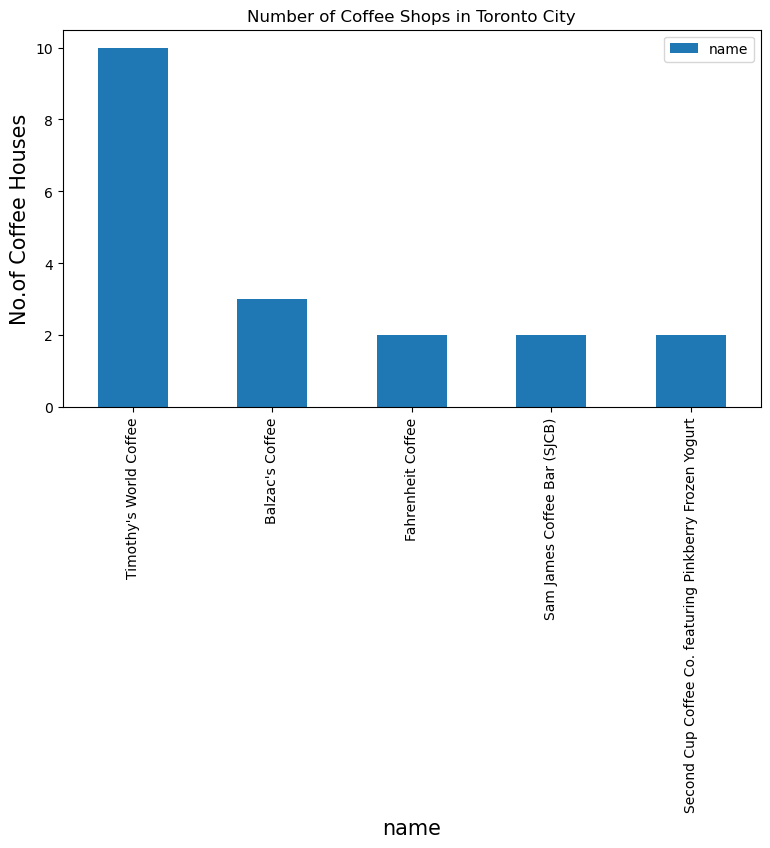

In [59]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Coffee Shops in Toronto City')
#On x-axis
plt.xlabel('Street Name', fontsize = 15)
#On y-axis
plt.ylabel('No.of Coffee Houses', fontsize=15)
#giving a bar plot
dataframe_filtered.groupby('name')['name'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

# Conclusion:

Timothy's World Coffee has the most number of outlets around the neighbourhood of Toronto, Canada. Balzac's Coffee stands at second place. In order to compete with the best, a new cafe can be established around these two coffee houses